# GPS-X with Python: Controlling Wastewater Treatment Simulation

This Python script is designed to control a wastewater treatment plant simulation in GPS-X. It introduces random events like rainfall and controls the influent flow rate to the plant.

## User Inputs

The `USER INPUTS` section defines variables that will be used throughout the script.

- **RainInflow**: A list containing different rates of rainfall in mm/hr.
- **CommInt**: Communication interval for the simulation.
- **StopTime**: The time at which the simulation will stop.
- **Count**: A counter variable initialized to 0.
- **MaxAeratorFlow**: The maximum flow rate that the aerator can handle.

## Functions

The `FUNCTIONS` section contains three main functions:

1. **start()**: Initializes the simulation settings.
2. **cint()**: Called at each communication interval to update the simulation.
3. **eor()**: Called at the end of the simulation run.

In [1]:
# USER INPUTS
RainInflow = [0, 0.0025, 0.005, 0.0075, 0.01]  # Rainfall rates in mm/hr
CommInt = 0.05  # Communication interval
StopTime = 50.0  # Simulation stop time
Count = 0  # Counter variable
MaxAeratorFlow = 4000  # Maximum flow rate for the aerator

# FUNCTIONS

# Initialize the simulation settings
def start():
    global CommInt, StopTime
    gpsx.setTstop(StopTime)  # Set the simulation stop time
    gpsx.setCint(CommInt)  # Set the communication interval
    gpsx.setValue('qconbypass', 0.0)  # Initialize the bypass flow rate to 0

# Called at each communication interval
def cint():
    global RainInflow, MaxAeratorFlow, Count
    import random  # Import the random library
    RainProbability = random.randint(1, 100)  # Generate a random number between 1 and 100
    
    # Reset the counter if it reaches 1
    if Count == 1.0:
        Count = 0

        # Set the rainfall rate based on the random number generated
        if RainProbability <= 85:
            gpsx.setValue("rainfallrain", RainInflow[0])
        elif RainProbability > 85 and RainProbability <= 90:
            gpsx.setValue("rainfallrain", RainInflow[1])
        elif RainProbability > 90 and RainProbability <= 95:
            gpsx.setValue("rainfallrain", RainInflow[2])
        elif RainProbability > 95 and RainProbability <= 98:
            gpsx.setValue("rainfallrain", RainInflow[3])
        else:
            gpsx.setValue("rainfallrain", RainInflow[4])

    # Get the current influent flow rate
    Inflow = gpsx.getValue('qmixinf')

    # Control the bypass flow rate based on the current influent flow rate
    if Inflow > MaxAeratorFlow:
        gpsx.setValue('qconbypass', (Inflow - MaxAeratorFlow))
    else:
        gpsx.setValue('qconbypass', 0.0)

    # Update the counter
    Count = round((Count + CommInt), 2)

# Called at the end of the simulation run
def eor():
    global finished
    finished = True  # Set the 'finished' flag to True

# Run the simulation
try:
    runSim()
except Exception:
    pass


## Results of the simulation

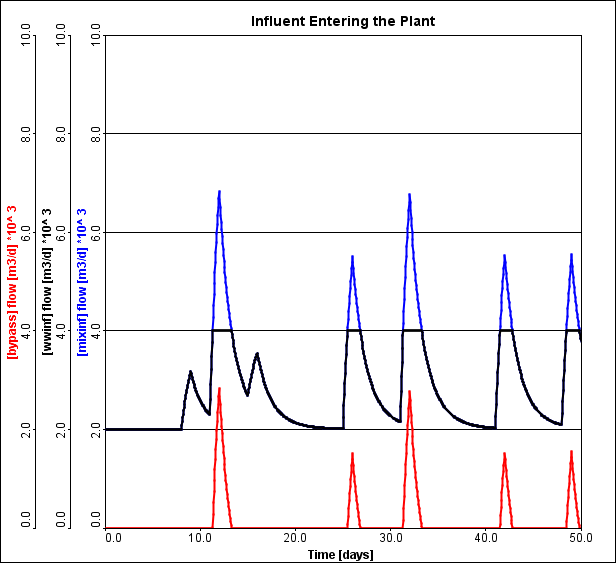

### Variables:
- `t`: Time in days
- `qmixinf`: Mixed inflow rate in m³/d
- `qwwinf`: Wastewater inflow rate in m³/d
- `qbypass`: Bypass flow rate in m³/d

### Observations:

1. **Steady State Initially**: 
    - For the first 8 days (`t` from 0 to 8), all the rates (`qmixinf`, `qwwinf`, `qbypass`) remain constant. 
    - Specifically, `qmixinf` and `qwwinf` are at 2000 m³/d, and `qbypass` is at 0 m³/d. 
    - This suggests a steady state where inflow rates are constant and no bypass is happening.

2. **Sudden Increase**: 
    - At `t = 8.05`, `qmixinf` and `qwwinf` start to increase gradually until they reach around 3167 m³/d at `t = 9.0`. 
    - This could indicate a sudden event that increased the inflow rates.

3. **Decrease and Stabilization**: 
    - After reaching the peak, the rates start to decrease and stabilize around `t = 13.3` at 3990 m³/d for `qmixinf` and `qwwinf`.

4. **Bypass Activation**: 
    - At `t = 11.3`, `qbypass` starts to show non-zero values, peaking at 2833 m³/d at `t = 12.0`. 
    - This suggests that a bypass system was activated to handle the extra inflow.

5. **Fluctuations**: 
    - After `t = 13.3`, the rates fluctuate, showing increases and decreases but generally staying within a range. 
    - This could indicate variable conditions affecting the inflow rates.

6. **Return to Steady State**: 
    - Towards the end of the data set, around `t = 22.2`, the rates seem to be stabilizing again, although the data is incomplete.

### Summary:
- The system starts in a steady state.
- Experiences a sudden increase in inflow rates.
- Activates a bypass system to manage the extra inflow.
- Goes through a period of fluctuation.
- Appears to be returning to a steady state.
